### Reading csv containing the audio features of all the equipments of ACME Corp.

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv(".\\norm_ab_all.csv")

In [32]:
df.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,class,type
0,0.492023,1008.306897,1307.778275,2056.085264,0.010266,0.056836,0,fan
1,0.290054,1525.724574,1829.778919,3333.890775,0.009034,0.091764,0,fan
2,0.544418,1162.260749,1450.298114,2492.062700,0.010190,0.066887,0,fan
3,0.254849,1589.277301,1862.407870,3592.676717,0.008921,0.100637,0,fan
4,0.586366,1021.048914,1428.979775,2240.565096,0.010546,0.048529,0,fan


### Creating a new dataframe without the column 'class'

In [33]:
df2 = df.iloc[: , :-2]

In [34]:
df2.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate
0,0.492023,1008.306897,1307.778275,2056.085264,0.010266,0.056836
1,0.290054,1525.724574,1829.778919,3333.890775,0.009034,0.091764
2,0.544418,1162.260749,1450.298114,2492.062700,0.010190,0.066887
3,0.254849,1589.277301,1862.407870,3592.676717,0.008921,0.100637
4,0.586366,1021.048914,1428.979775,2240.565096,0.010546,0.048529


In [35]:
# check number of invalid metric entries
print(df2.isnull().sum())

chroma_stft           0
spectral_centroid     0
spectral_bandwidth    0
spectral_rolloff      0
rms                   0
zero_crossing_rate    0
dtype: int64


## Clustering Algorithms

## KMeans

In [93]:
from sklearn.cluster import KMeans

# number of sound clusters
team_size = 3


#audio_metrics
# z-score normalisation
audio_metrics_normalized = (df2-df2.mean())/df2.std()
audio_metrics_normalized = audio_metrics_normalized.rename(columns={'chroma_stft': 'chroma_stft_zscore',
                                                                        'spectral_centroid':'spectral_centroid_zscore',
                                                                        'spectral_bandwidth':'spectral_bandwidth_zscore',
                                                                        'spectral_rolloff':'spectral_rolloff_zscore',
                                                                       'rms':'rms_zscore',
                                                                       'zero_crossing_rate':'zero_crossing_rate_zscore',})

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(audio_metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
audio_metrics_normalized = audio_metrics_normalized.join(cluster_labels.to_frame())

### Comparing the dataframes of before and after clustering

#### Dataframe before normalization and clustering

In [123]:
df.head(10)

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rms,zero_crossing_rate,class,type
0,0.492023,1008.306897,1307.778275,2056.085264,0.010266,0.056836,0,fan
1,0.290054,1525.724574,1829.778919,3333.890775,0.009034,0.091764,0,fan
2,0.544418,1162.260749,1450.298114,2492.062700,0.010190,0.066887,0,fan
3,0.254849,1589.277301,1862.407870,3592.676717,0.008921,0.100637,0,fan
4,0.586366,1021.048914,1428.979775,2240.565096,0.010546,0.048529,0,fan
5,0.343122,1458.415276,1796.744673,3039.162340,0.008979,0.095539,0,fan
6,0.611089,1073.727114,1464.784845,2199.455871,0.009914,0.055907,0,fan
7,0.625782,1407.627949,1802.815909,3313.947684,0.010187,0.069596,0,fan
8,0.543149,1115.726066,1281.953233,2138.079073,0.008654,0.082286,0,fan
9,0.331048,1448.460585,1810.530549,2982.502995,0.008867,0.092792,0,fan


#### Dataframe after normalization and clustering using Kmeans

In [124]:
audio_metrics_normalized.head(10)

,chroma_stft_zscore,spectral_centroid_zscore,spectral_bandwidth_zscore,spectral_rolloff_zscore,rms_zscore,zero_crossing_rate_zscore,cluster
0,0.200043,-1.159087,-1.512990,-1.196510,0.451114,-0.833360,1
1,-1.315724,0.314377,0.656105,0.396920,-0.552217,0.142527,0
2,0.593266,-0.720669,-0.920770,-0.652844,0.389678,-0.552536,1
3,-1.579935,0.495358,0.791690,0.719628,-0.644721,0.390444,0
4,0.908086,-1.122802,-1.009355,-0.966463,0.679498,-1.065455,1
5,-0.917454,0.122699,0.518837,0.029392,-0.597448,0.248005,0
6,1.093629,-0.972788,-0.860573,-1.017726,0.164539,-0.859294,1
7,1.203895,-0.021930,0.544065,0.372051,0.386857,-0.476828,1
8,0.583740,-0.853187,-1.620302,-1.094263,-0.862408,-0.122300,1
9,-1.008068,0.094350,0.576122,-0.041262,-0.688263,0.171251,0


### Compostion of Clusters

In [116]:
audio_metrics_normalized.cluster.count()

5101

In [119]:
audio_metrics_normalized.cluster.value_counts()

1    2632
0    2002
2     467
Name: cluster, dtype: int64

In [120]:
Percentage_cluster1 = 2632*100 / 5101
print(Percentage_cluster1)

51.59772593609096


In [121]:
Percentage_cluster2 = 2002*100 / 5101
print(Percentage_cluster2)

39.247206430111746


In [122]:
Percentage_cluster3 = 467*100 / 5101
print(Percentage_cluster3)

9.155067633797294


### Data Visualization before and after clustering

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Before

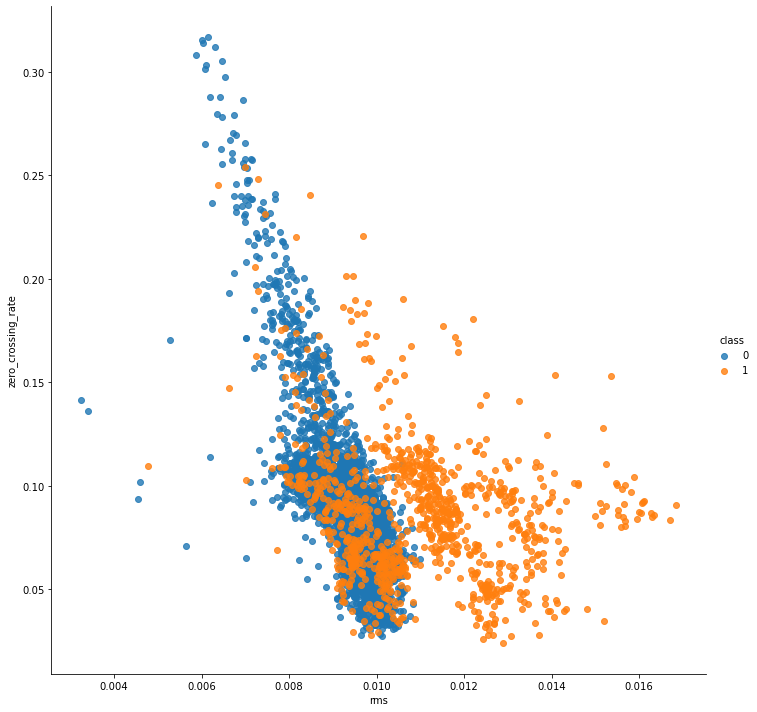

In [97]:
sns.lmplot(x='rms', y='zero_crossing_rate',  height=10, data=df,
           fit_reg=False, hue='class')

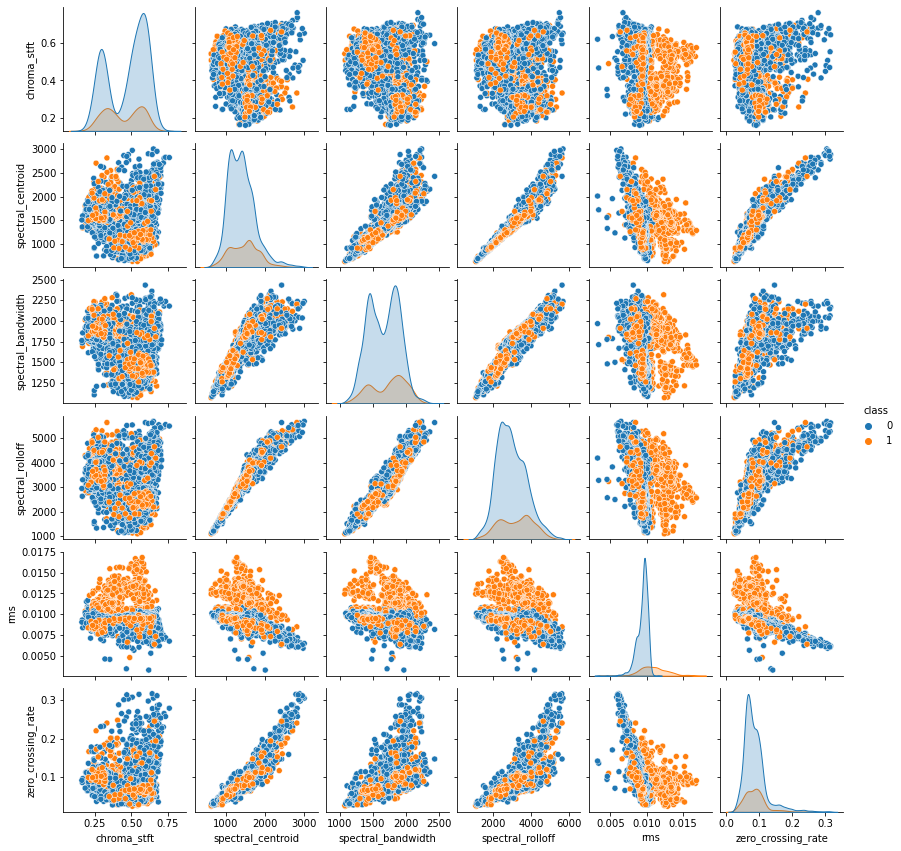

In [99]:
sns.pairplot(df, 
             hue = 'class', diag_kind = 'kde', 
             #plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 2);

#### After

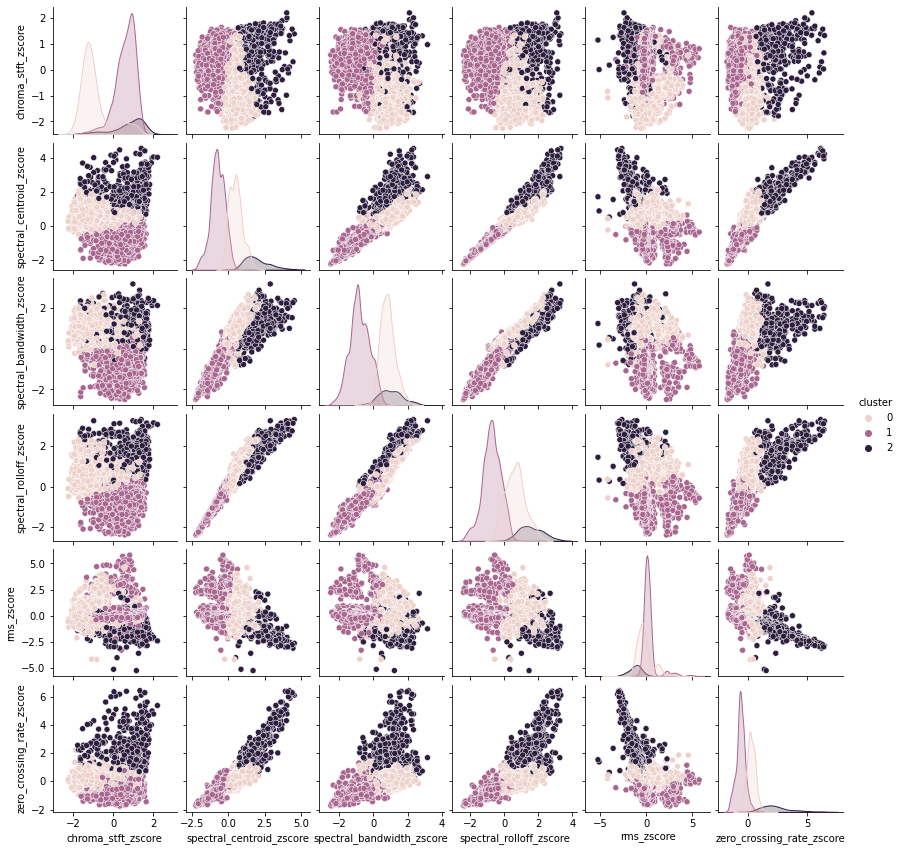

In [102]:
sns.pairplot(audio_metrics_normalized, 
             hue = 'cluster', diag_kind = 'kde', 
             height = 2);

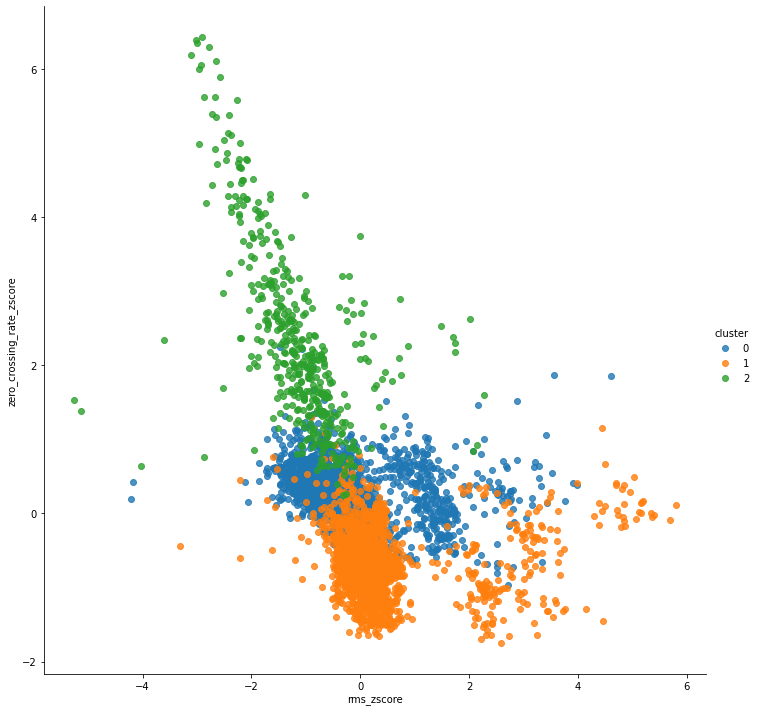

In [117]:
sns.lmplot(x='rms_zscore', y='zero_crossing_rate_zscore',  height=10, data=audio_metrics_normalized,
           fit_reg=False, hue='cluster')

#### Data insights: 
* Cluster 2 is for normal audio
* Cluster 1 is for transitory audio
* Cluster 0 is for abnormal audio

## DBSCAN

In [90]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import DBSCAN

# Number of audio clusters
team_size = 8

# z-score normalisation
audio_metrics_normalized = (df2-df2.mean())/df2.std()
audio_metrics_normalized = audio_metrics_normalized.rename(columns={'chroma_stft': 'chroma_stft_zscore',
                                                                        'spectral_centroid':'spectral_centroid_zscore',
                                                                        'spectral_bandwidth':'spectral_bandwidth_zscore',
                                                                        'spectral_rolloff':'spectral_rolloff_zscore',
                                                                       'rms':'rms_zscore',
                                                                       'zero_crossing_rate':'zero_crossing_rate_zscore',})
# Create a model for the dataset
dbscan_model = DBSCAN(eps=0.25, min_samples=team_size)

# Assign each data point to a cluster
dbscan_result = dbscan_model.fit_predict(audio_metrics_normalized)

# Get all of the unique clusters
dbscan_cluster = unique(dbscan_result)



# Add cluster index to dataframe
cluster_labels = pd.Series(dbscan_model.labels_, name='cluster')
audio_metrics_normalized = audio_metrics_normalized.join(cluster_labels.to_frame())

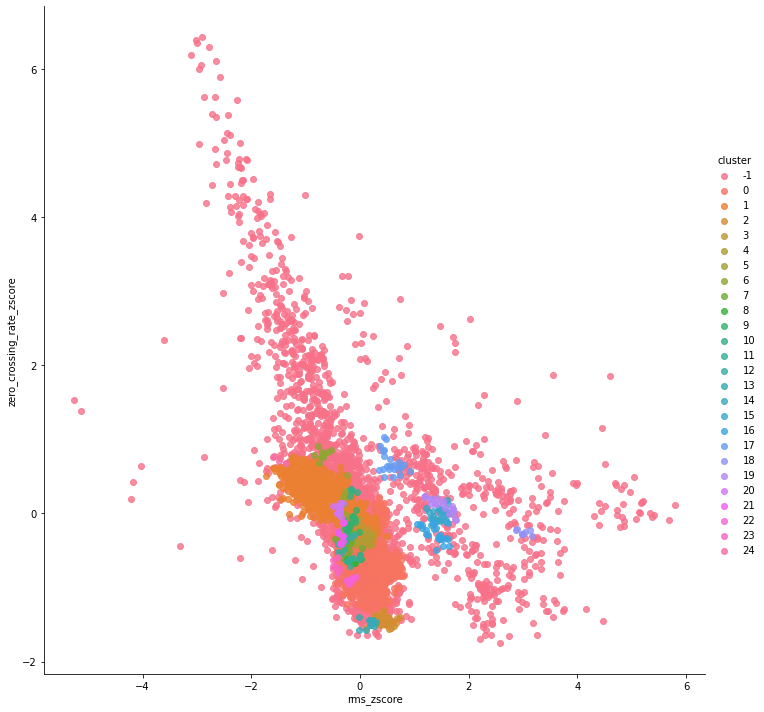

In [91]:
sns.lmplot(x='rms_zscore', y='zero_crossing_rate_zscore',  height=10, data=audio_metrics_normalized,
           fit_reg=False, hue='cluster')

In [36]:
audio_metrics_normalized.head(10)

,chroma_stft_zscore,spectral_centroid_zscore,spectral_bandwidth_zscore,spectral_rolloff_zscore,rms_zscore,zero_crossing_rate_zscore,cluster
0,1.188325,-1.044661,-1.355427,-1.059904,1.674200,-0.726772,4
1,1.018738,-1.302126,-1.355827,-1.451406,1.545712,-1.072075,9
2,0.899153,-0.048648,0.280440,0.143642,1.351010,-0.235517,10
3,-0.792681,-1.011176,-2.032459,-1.191653,2.527231,-0.509436,9
4,0.177036,-1.338468,-1.519920,-1.318754,3.030882,-1.363184,9
5,0.616258,-1.135200,-1.389978,-1.127537,1.740248,-0.879704,4
6,1.128213,-1.029867,-0.854502,-0.957455,3.007122,-1.182898,4
7,1.373108,1.008814,0.175571,0.662472,0.880662,1.503035,10
8,1.155979,-1.243469,-1.635955,-1.276774,1.524984,-0.925560,9
9,1.164804,-1.273113,-1.786216,-1.335082,1.682706,-0.886355,9


### BIRCH

In [87]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import Birch

# Number of audio clusters
team_size = 3

# z-score normalisation
audio_metrics_normalized = (df2-df2.mean())/df2.std()
audio_metrics_normalized = audio_metrics_normalized.rename(columns={'chroma_stft': 'chroma_stft_zscore',
                                                                        'spectral_centroid':'spectral_centroid_zscore',
                                                                        'spectral_bandwidth':'spectral_bandwidth_zscore',
                                                                        'spectral_rolloff':'spectral_rolloff_zscore',
                                                                       'rms':'rms_zscore',
                                                                       'zero_crossing_rate':'zero_crossing_rate_zscore',})

# Fit a Birch object to the dataset
Birch_model = Birch(threshold=0.08, n_clusters=team_size).fit(audio_metrics_normalized)

# Assign each data point to a cluster
Birch_result = Birch_model.predict(audio_metrics_normalized)

# Get all of the unique clusters
Birch_clusters = unique(Birch_result)


# Add cluster index to dataframe
cluster_labels = pd.Series(Birch_model.labels_, name='cluster')
audio_metrics_normalized = audio_metrics_normalized.join(cluster_labels.to_frame())

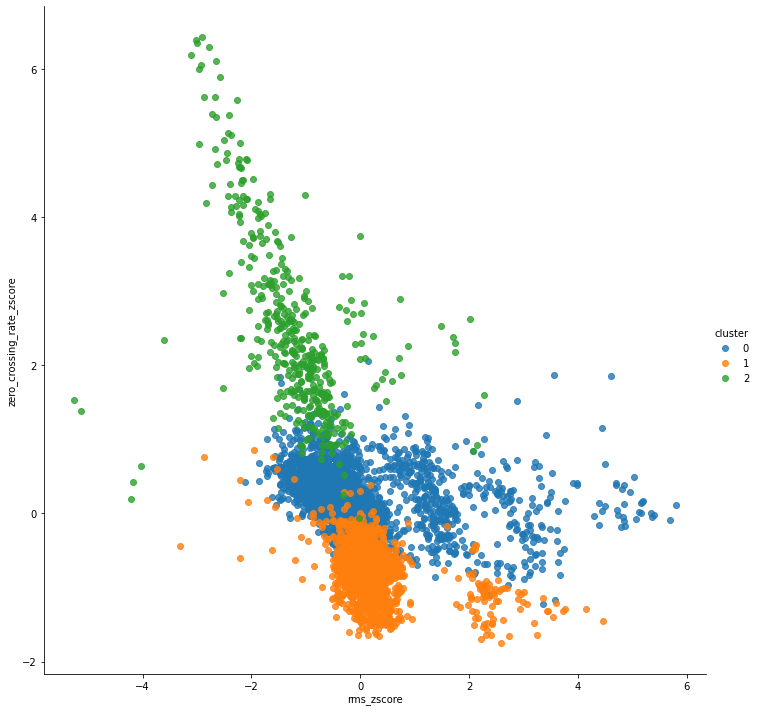

In [88]:
sns.lmplot(x='rms_zscore', y='zero_crossing_rate_zscore',  height=10, data=audio_metrics_normalized,
           fit_reg=False, hue='cluster')

### AgglomerativeClustering

In [117]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import AgglomerativeClustering

# number of audio clusters
team_size = 3

# z-score normalisation
audio_metrics_normalized = (df2-df2.mean())/df2.std()
audio_metrics_normalized = audio_metrics_normalized.rename(columns={'chroma_stft': 'chroma_stft_zscore',
                                                                        'spectral_centroid':'spectral_centroid_zscore',
                                                                        'spectral_bandwidth':'spectral_bandwidth_zscore',
                                                                        'spectral_rolloff':'spectral_rolloff_zscore',
                                                                       'rms':'rms_zscore',
                                                                       'zero_crossing_rate':'zero_crossing_rate_zscore',})
# Define the model
agglomerative_model = AgglomerativeClustering(n_clusters=team_size)

# Assign each data point to a cluster
agglomerative_result = agglomerative_model.fit_predict(audio_metrics_normalized)

# get all of the unique clusters
agglomerative_clusters = unique(agglomerative_result)


# add cluster index to dataframe
cluster_labels = pd.Series(agglomerative_model.labels_, name='cluster')
audio_metrics_normalized = audio_metrics_normalized.join(cluster_labels.to_frame())

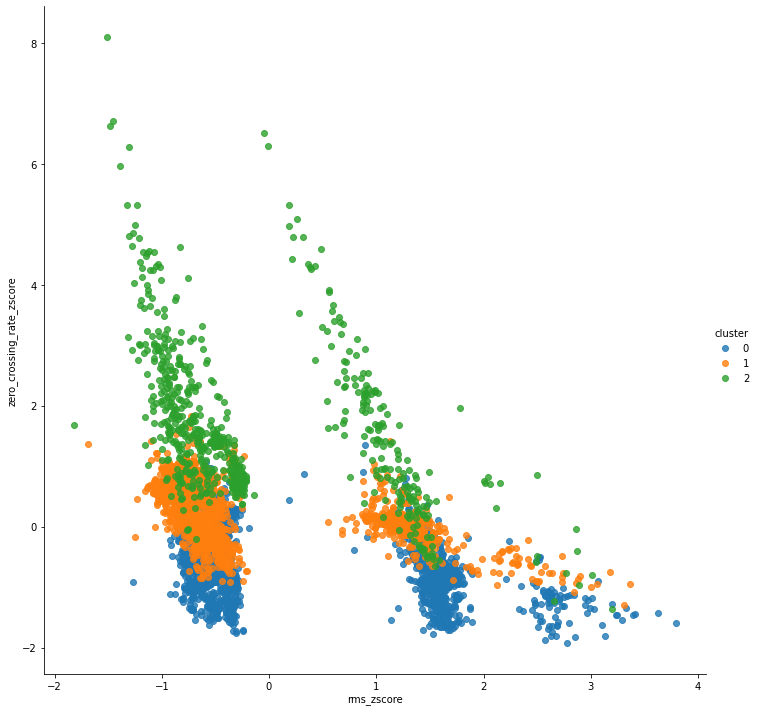

In [118]:
sns.lmplot(x='rms_zscore', y='zero_crossing_rate_zscore',  height=10, data=audio_metrics_normalized,
           fit_reg=False, hue='cluster')